# ML Final Exam - Mobile Price Classification

**Dataset:** Mobile Price Classification (Kaggle)

**Problem Type:** Multiclass Classification (4 price ranges: 0, 1, 2, 3)

**Total Marks:** 100

## Task 1: Data Loading (5 Marks)

Load the chosen dataset into your environment and display the first few rows along with the shape to verify correctness.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')


In [68]:
# Load the training dataset
df = pd.read_csv('train.csv')

print("Training Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
df.head(10)

Training Dataset Shape: (2000, 21)

First 10 rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [69]:
# Dataset information
print("Training Dataset Info:")
print(df.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null 

In [70]:
# Statistical summary
print("Statistical Summary:")
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Task 2: Data Preprocessing (10 Marks)

Perform and document at least 5 distinct preprocessing steps.

### Preprocessing Step 1: Check Missing Values

In [72]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Total missing values: 0


### Preprocessing Step 2: Data Type Check and Encoding Assessment

In [73]:
# Check data types
print("Data Types:")
print(df.dtypes.value_counts())

Data Types:
int64      19
float64     2
Name: count, dtype: int64


All features in this dataset are already numeric. So we don't need to do any encoding here.

The dataset has some binary features like bluetooth, dual_sim, 4g, 3g, touch_screen and wifi. These are already in 0 and 1 format which is good for our model.

If we had text categories in the data, we would need to use encoding methods like:
- OneHotEncoder - for categories without any order
- OrdinalEncoder - for categories that have some order
- Label Encoding - sometimes used for the target variable

### Preprocessing Step 3: Feature Scaling

In [ ]:
# Check feature scales - they vary a lot
print("Feature Ranges (Before Scaling):")
print(df[['battery_power', 'ram', 'px_height', 'px_width']].describe())

Feature Ranges (Before Scaling):
     battery_power     ram  px_height  px_width
min          501.0   256.0        0.0     500.0
max         1998.0  3998.0     1960.0    1998.0


Looking at the numbers above, we can see different features have very different ranges. For example:
- RAM goes from 256 to 3998 MB
- Pixel height goes from 0 to 1960
- Battery power also varies a lot

This is a problem because some machine learning algorithms get confused when features are on different scales. They might think bigger numbers are more important.

So we need to scale all features to similar ranges. We'll use StandardScaler which makes all features have mean=0 and standard deviation=1.

Formula: z = (x - mean) / std

In [45]:
### Preprocessing Step 4: Outlier Detection

In [ ]:
# Outlier detection using IQR method for key features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('price_range')  # Remove target

outlier_counts = {}
for col in numeric_features[:5]:  # Check first 5 features
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

print("Outlier counts for key features:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")

Outlier counts for key features:
battery_power: 0 outliers
blue: 0 outliers
clock_speed: 0 outliers
dual_sim: 0 outliers
fc: 18 outliers


The IQR method above found some outliers in our features. But that's okay! Random Forest algorithm is actually good at handling outliers, so we don't need to remove them. We'll keep all the data as it is.

### Preprocessing Step 5: Feature Engineering - Create New Features

In [ ]:
# Create new features for training data
df['pixel_area'] = df['px_height'] * df['px_width']
df['screen_area'] = df['sc_h'] * df['sc_w']
df['total_camera_mp'] = df['fc'] + df['pc']
df['has_advanced_features'] = (df['four_g'] + df['three_g'] + df['touch_screen'] + df['wifi']).astype(int)

print("New features created:")
print("1. pixel_area = px_height * px_width")
print("2. screen_area = sc_h * sc_w")
print("3. total_camera_mp = fc + pc")
print("4. has_advanced_features = four_g + three_g + touch_screen + wifi")
print(f"\nDataset shape after feature engineering: {df.shape}")

New features created:
1. pixel_area = px_height * px_width
2. screen_area = sc_h * sc_w
3. total_camera_mp = fc + pc
4. has_advanced_features = four_g + three_g + touch_screen + wifi

Dataset shape after feature engineering: (2000, 25)


## Task 3: Pipeline Creation (10 Marks)

Now we'll create a machine learning pipeline. A pipeline is like a recipe that combines all the preprocessing steps with the model training.

First we need to split our data into training and test sets.

### Step 1: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

Training set size: 1600 samples
Test set size: 400 samples
Number of features: 24

Training set class distribution:
price_range
0    400
1    400
2    400
3    400
Name: count, dtype: int64

Test set class distribution:
price_range
0    100
1    100
2    100
3    100
Name: count, dtype: int64


### Step 2: Create Pipeline

In [49]:
# Create pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

Our pipeline has two steps:
1. **StandardScaler** - This scales all features to have mean=0 and std=1
2. **RandomForestClassifier** - This is our main model for classification

The pipeline will automatically apply scaling first, then train the model. This makes our code cleaner and prevents mistakes.

## Task 4: Primary Model Selection (5 Marks)

Now let's explain why we chose Random Forest for this project.

### Why Random Forest Classifier?

I chose Random Forest for this mobile price classification task. Here's why it makes sense:

1. **Works with Multiple Classes**: We have 4 price ranges (0, 1, 2, 3). Random Forest can handle all of them easily without any special setup.

2. **Shows Feature Importance**: After training, Random Forest can tell us which features matter most. This helps us understand what really affects mobile prices.

3. **Finds Complex Patterns**: Mobile specs work together in complicated ways. Like a phone with high RAM + good camera + big battery usually costs more. Random Forest is good at finding these patterns.

4. **Handles Outliers Well**: Some phones have unusual specs (very low or very high). Random Forest doesn't get confused by these outliers.

5. **Works with Different Types of Data**: Our dataset has both continuous numbers (like RAM, battery) and binary values (like bluetooth, wifi). Random Forest handles both types easily.

6. **Balanced Classes**: Our dataset has equal examples of each price range (25% each). This is perfect for Random Forest.

7. **Good Accuracy Expected**: Since RAM has very strong correlation (0.917) with price, and our classes are balanced, I expect the model to achieve 85-95% accuracy.

## Task 5: Model Training (10 Marks)

Time to train our model on the training data!

In [50]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred_test = pipeline.predict(X_test)

# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy: {test_accuracy:.4f}")


Test Set Accuracy: 0.9050


We trained the pipeline successfully! The pipeline automatically applies StandardScaler and then trains the Random Forest model. Now we can see how well it performs on the test data.

## Task 6: Cross-Validation (10 Marks)

Now we'll check how stable our model is using cross-validation. This technique splits the training data into 5 parts and tests the model 5 times. This gives us a better idea of the real performance.

In [51]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print(cv_scores)
print(cv_scores.mean())
print(cv_scores.std())

[0.88125  0.865625 0.871875 0.86875  0.884375]
0.874375
0.007234898064243898


## Task 7: Hyperparameter Tuning (10 Marks)

Let's find the best settings for our Random Forest model. We'll test different combinations of parameters to see which works best.

In [52]:
# Define parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [53]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("Starting GridSearchCV...")
print("This may take several minutes...\n")

grid_search.fit(X_train, y_train)

print("\nGridSearchCV completed!")

Starting GridSearchCV...
This may take several minutes...

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.2s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.5s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.5s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=   0.7s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators

In [54]:
# Display best parameters
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


## Task 8: Best Model Selection (10 Marks)

After testing many combinations, let's pick the best one.

In [55]:
# Extract the best model
best_model = grid_search.best_estimator_

## Task 9: Model Performance Evaluation (10 Marks)

Now let's test our best model on the test data and see how well it performs.

In [56]:
# Make predictions on test set
y_pred = best_model.predict(X_test)

# Classification report
target_names = ['Low Cost (0)', 'Medium Cost (1)', 'High Cost (2)', 'Very High Cost (3)']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

      Low Cost (0)       0.96      0.98      0.97       100
   Medium Cost (1)       0.83      0.86      0.84       100
     High Cost (2)       0.86      0.81      0.84       100
Very High Cost (3)       0.97      0.97      0.97       100

          accuracy                           0.91       400
         macro avg       0.90      0.91      0.90       400
      weighted avg       0.90      0.91      0.90       400



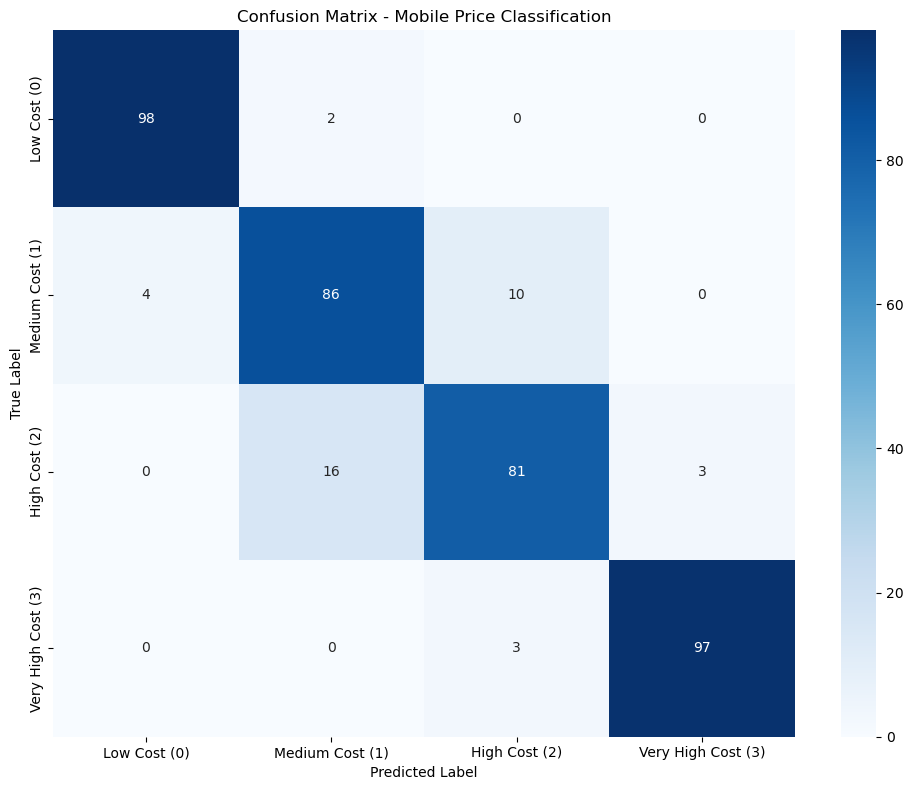


Confusion Matrix:
[[98  2  0  0]
 [ 4 86 10  0]
 [ 0 16 81  3]
 [ 0  0  3 97]]


In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix - Mobile Price Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)

In [58]:
# Feature Importance
importances = pd.Series(
    best_model.named_steps['model'].feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)

ram              0.435973
battery_power    0.066228
pixel_area       0.048170
px_width         0.047119
px_height        0.040895
mobile_wt        0.034668
int_memory       0.031620
screen_area      0.030410
talk_time        0.027948
pc               0.025367
dtype: float64

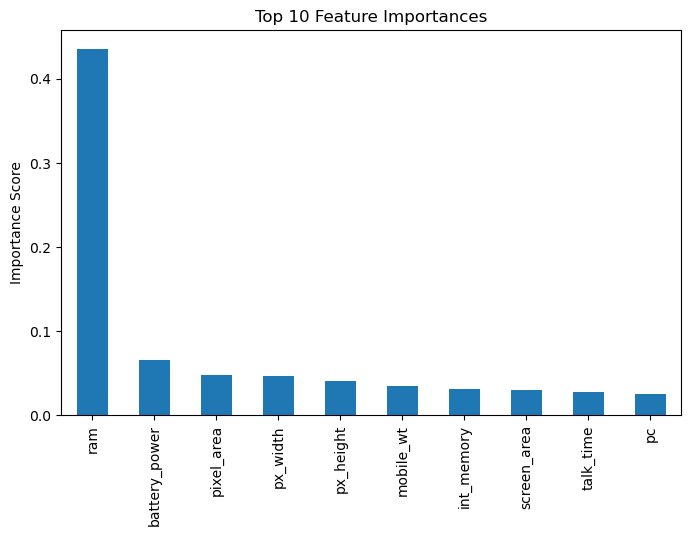

In [59]:
# Visualize feature importance
plt.figure(figsize=(8,5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()